<a href="https://colab.research.google.com/github/RahulYaramaneni7/CODESOFT/blob/main/Movie_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOVIE PREDICTION MODEL**
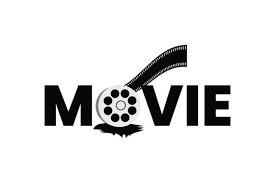

Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
train_data=pd.read_csv("IMDb Movies India.csv",encoding='ISO-8859-1')
train_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
train_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
train_data.shape

(7919, 10)

In [7]:
train_data.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [6]:
train_data.dropna(subset=["Rating"],inplace=True)

In [9]:
train_data.shape

(7919, 10)

In [10]:
train_data.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [11]:
train_data.isna().sum()

,0
Name,0
Year,0
Duration,1939
Genre,69
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [12]:
train_data["Genre"].fillna("Unknown",inplace=True)

<ipython-input-12-ac9e12f9d967>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Genre"].fillna("Unknown",inplace=True)


In [13]:
train_data['Year'] = train_data['Year'].str.extract(r'(\d+)').astype(int)

In [14]:
train_data['Votes'] = train_data['Votes'].str.extract(r'(\d+)').astype(int)


In [15]:
train_data['Duration'] = train_data['Duration'].str.extract(r'(\d+)').astype(float)
train_data['Duration'].fillna(train_data['Duration'].median(),inplace=True)

<ipython-input-15-a7c0e8efdb3b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Duration'].fillna(train_data['Duration'].median(),inplace=True)


In [16]:
train_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,135.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,135.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [17]:
train_data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


REMOVE OUTLIERS

In [18]:
selected_columns=["Year","Votes"]
z_score=pd.DataFrame()
for i in selected_columns:
  z_score[i]=(train_data[i]-train_data[i].mean())/train_data[i].std()

threshold=2

outliers=z_score[(z_score.abs()>threshold).any(axis=1)]
print("No.of outliers",len(outliers))

train_data=train_data[~((z_score.abs()>threshold).any(axis=1))]
train_data.shape

No.of outliers 781


(6846, 10)

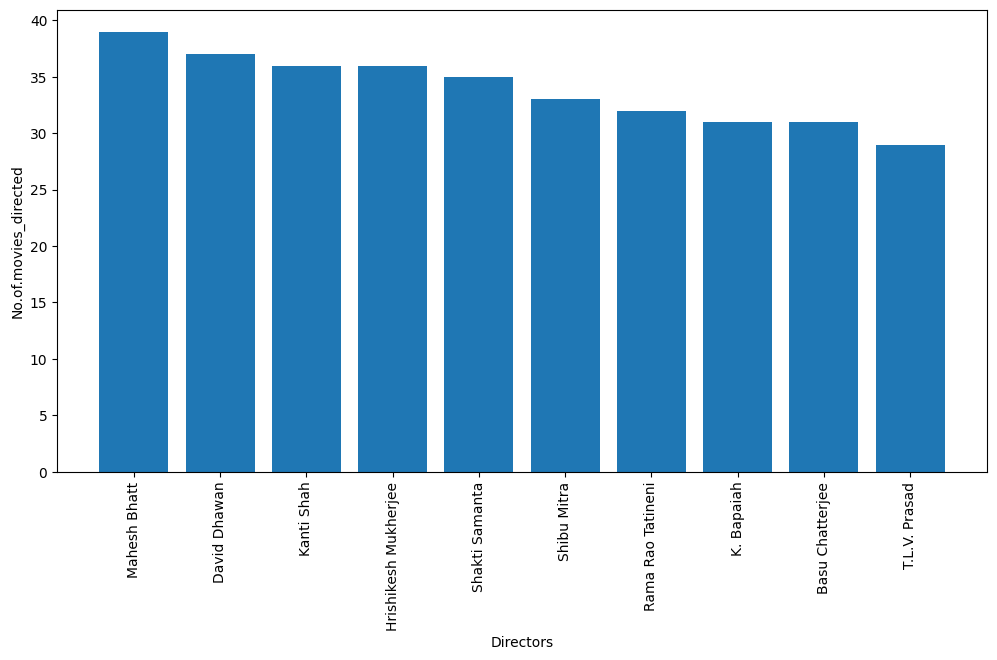

In [19]:
no_of_directors=train_data["Director"].value_counts()
top_10_directors=no_of_directors.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index,top_10_directors.values)
plt.xticks(rotation=90)
plt.xlabel("Directors")
plt.ylabel("No.of.movies_directed")
plt.show()

***Inference***

From the bar graph we can get to know that Kanti shah is the director
with most movies

**TOP 5 ACTORS WITH MOST MOVIE APPERENCES**

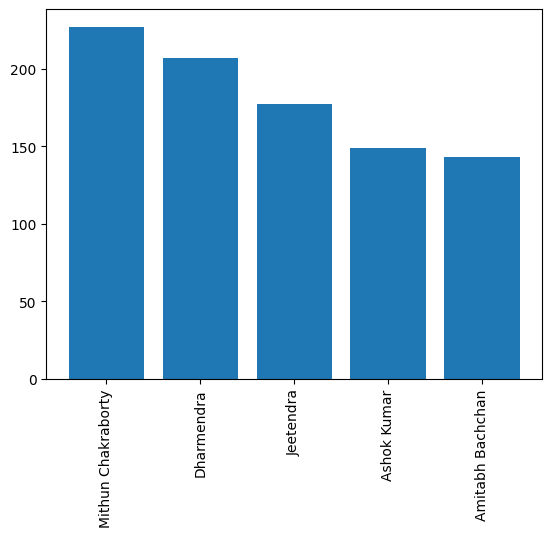

,count
Mithun Chakraborty,227
Dharmendra,207
Jeetendra,177
Ashok Kumar,149
Amitabh Bachchan,143


In [20]:
actors=train_data[["Actor 1","Actor 2","Actor 3"]].stack().value_counts().head(5)
plt.bar(actors.index,actors.values)
plt.xticks(rotation=90)
plt.show()
#actors.sort_values(ascending=False)
actors

**TOP 5 HIGHLY RATED MOVIES**

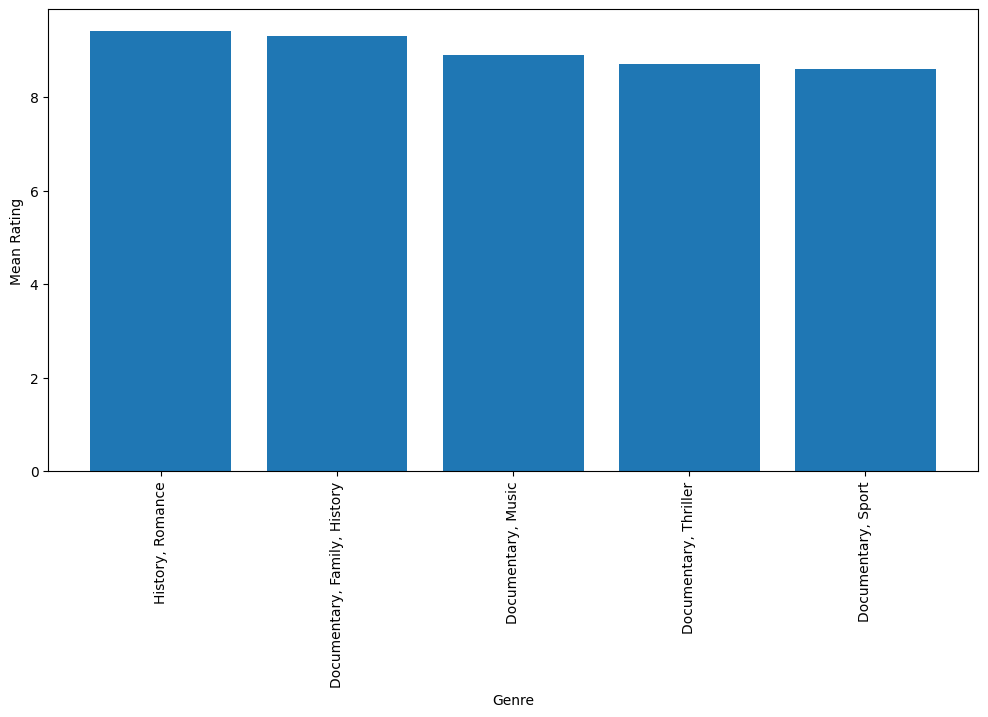

In [21]:
ratings=train_data.groupby("Genre")["Rating"].mean()
ratings=ratings.sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
plt.bar(ratings.index,ratings.values)
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()

**YEAR WISE TOP RATING**

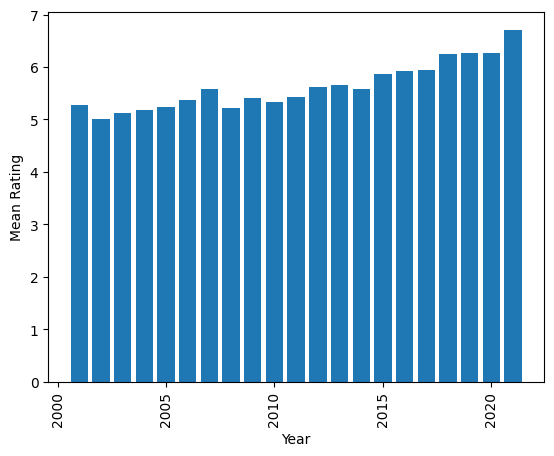

In [22]:
years=train_data['Year']
years=train_data[train_data['Year']>2000]
years=years.groupby('Year')['Rating'].mean()
year_rating=years.sort_values(ascending=False)
plt.bar(year_rating.index,year_rating.values)
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()


**Correlation Matrix**

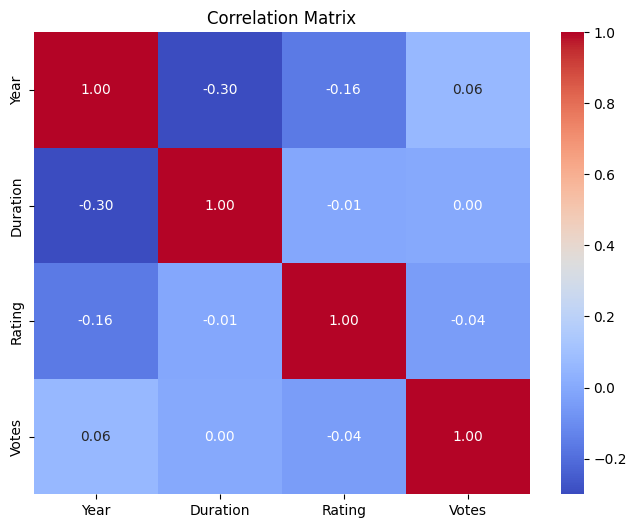

In [23]:
new_data=train_data.drop(columns=["Name","Genre","Actor 1","Actor 2","Actor 3","Director"],axis=1)
matrix=new_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matrix,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [32]:
X=train_data.drop(columns="Rating",axis=1)
Y=train_data["Rating"]

**Preprocessing**

In [35]:
categorical_columns = ['Name', 'Genre', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3']
ohe = OneHotEncoder(sparse_output=False)

X_categorical_encoded = ohe.fit_transform(X[categorical_columns])
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df.head()

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,Name_127 B,Name_13B: Fear Has a New Address,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
numerical_columns = ['Year', 'Duration', 'Votes']
scaler = MinMaxScaler()
X_numeric_scaled = scaler.fit_transform(X[numerical_columns])
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numerical_columns)
X_numeric_scaled_df.head()

,Year,Duration,Votes
0,0.970588,0.293333,0.015021
1,0.970588,0.296667,0.072961
2,0.764706,0.403333,0.000000
3,0.867647,0.203333,0.697425
4,0.897059,0.316667,0.021459


In [37]:
X_final = pd.concat([X_numeric_scaled_df, X_categorical_encoded_df, ], axis=1)
X_final.head()

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,0.970588,0.293333,0.015021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.970588,0.296667,0.072961,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.403333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.867647,0.203333,0.697425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.897059,0.316667,0.021459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:

scaler = MinMaxScaler()

y_scaled = scaler.fit_transform(train_data['Rating'].values.reshape(-1, 1))

# Convert 'y_scaled' back to a DataFrame
y = pd.DataFrame(y_scaled, columns=['Rating'])

print(y.head())

     Rating
0  0.662921
1  0.370787
2  0.707865
3  0.505618
4  0.325843


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_test = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_test = y_pred_test.reshape(-1)
y_pred_train = y_pred_train.reshape(-1)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Test Mean Squared Error : {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")
print(f"Train Mean Squared Error : {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")


Test Mean Squared Error : 0.019576002551437637
Test R-squared (R^2) Score: 0.15996140358771882
Train Mean Squared Error : 1.702224580574369e-30
Train R-squared (R^2) Score: 1.0
